In [2]:
# Gerekli Kütüphanelerin Yüklenmesi Yapılıyor

import numpy as np 
import pandas as pd 

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [4]:
#Veri setinin yüklemesi yapılıyor
dataset=pd.read_csv("winequality_red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Kaç farklı kalite puanı olduğunu öğrenelim
print("Kalite puanları:",dataset['quality'].unique())
dataset.info()

Kalite puanları: [5 6 7 4 8 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


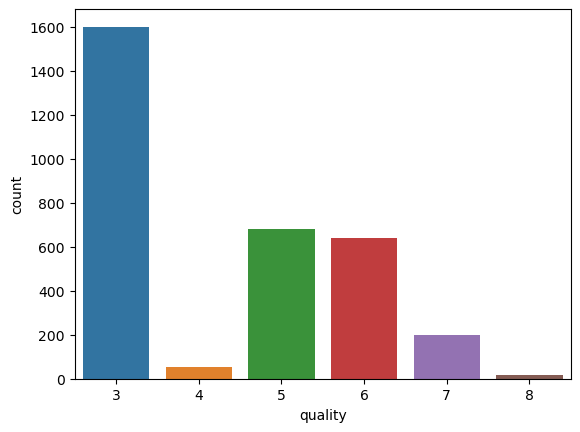

In [7]:
#Farklı kalite puanlarının görselleştirilmesi
sns.countplot(dataset['quality'])
sns.countplot(x='quality', data=dataset)
plt.show()


In [8]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak
#çizim türleri
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

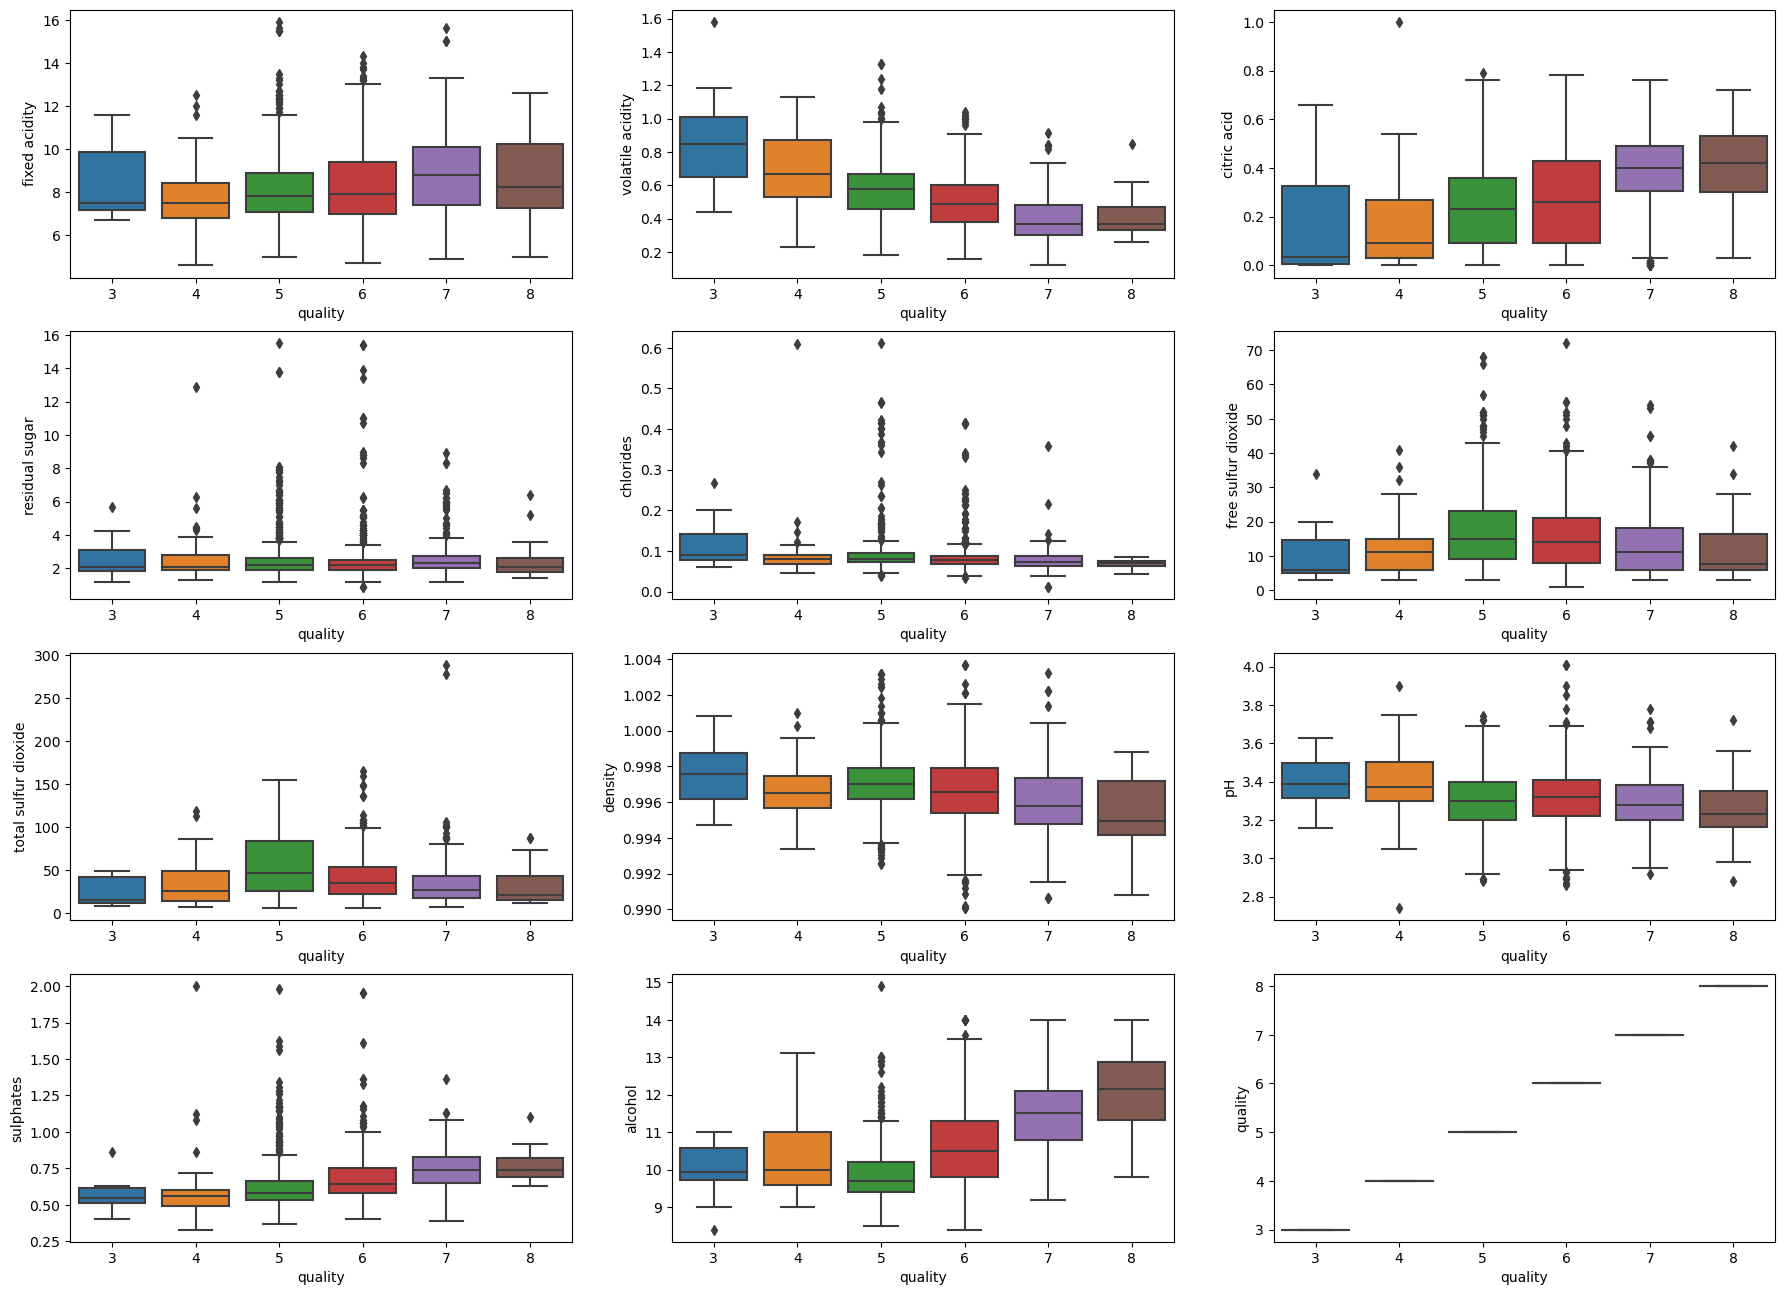

In [9]:
draw_multivarient_plot(dataset,4,3,"box")

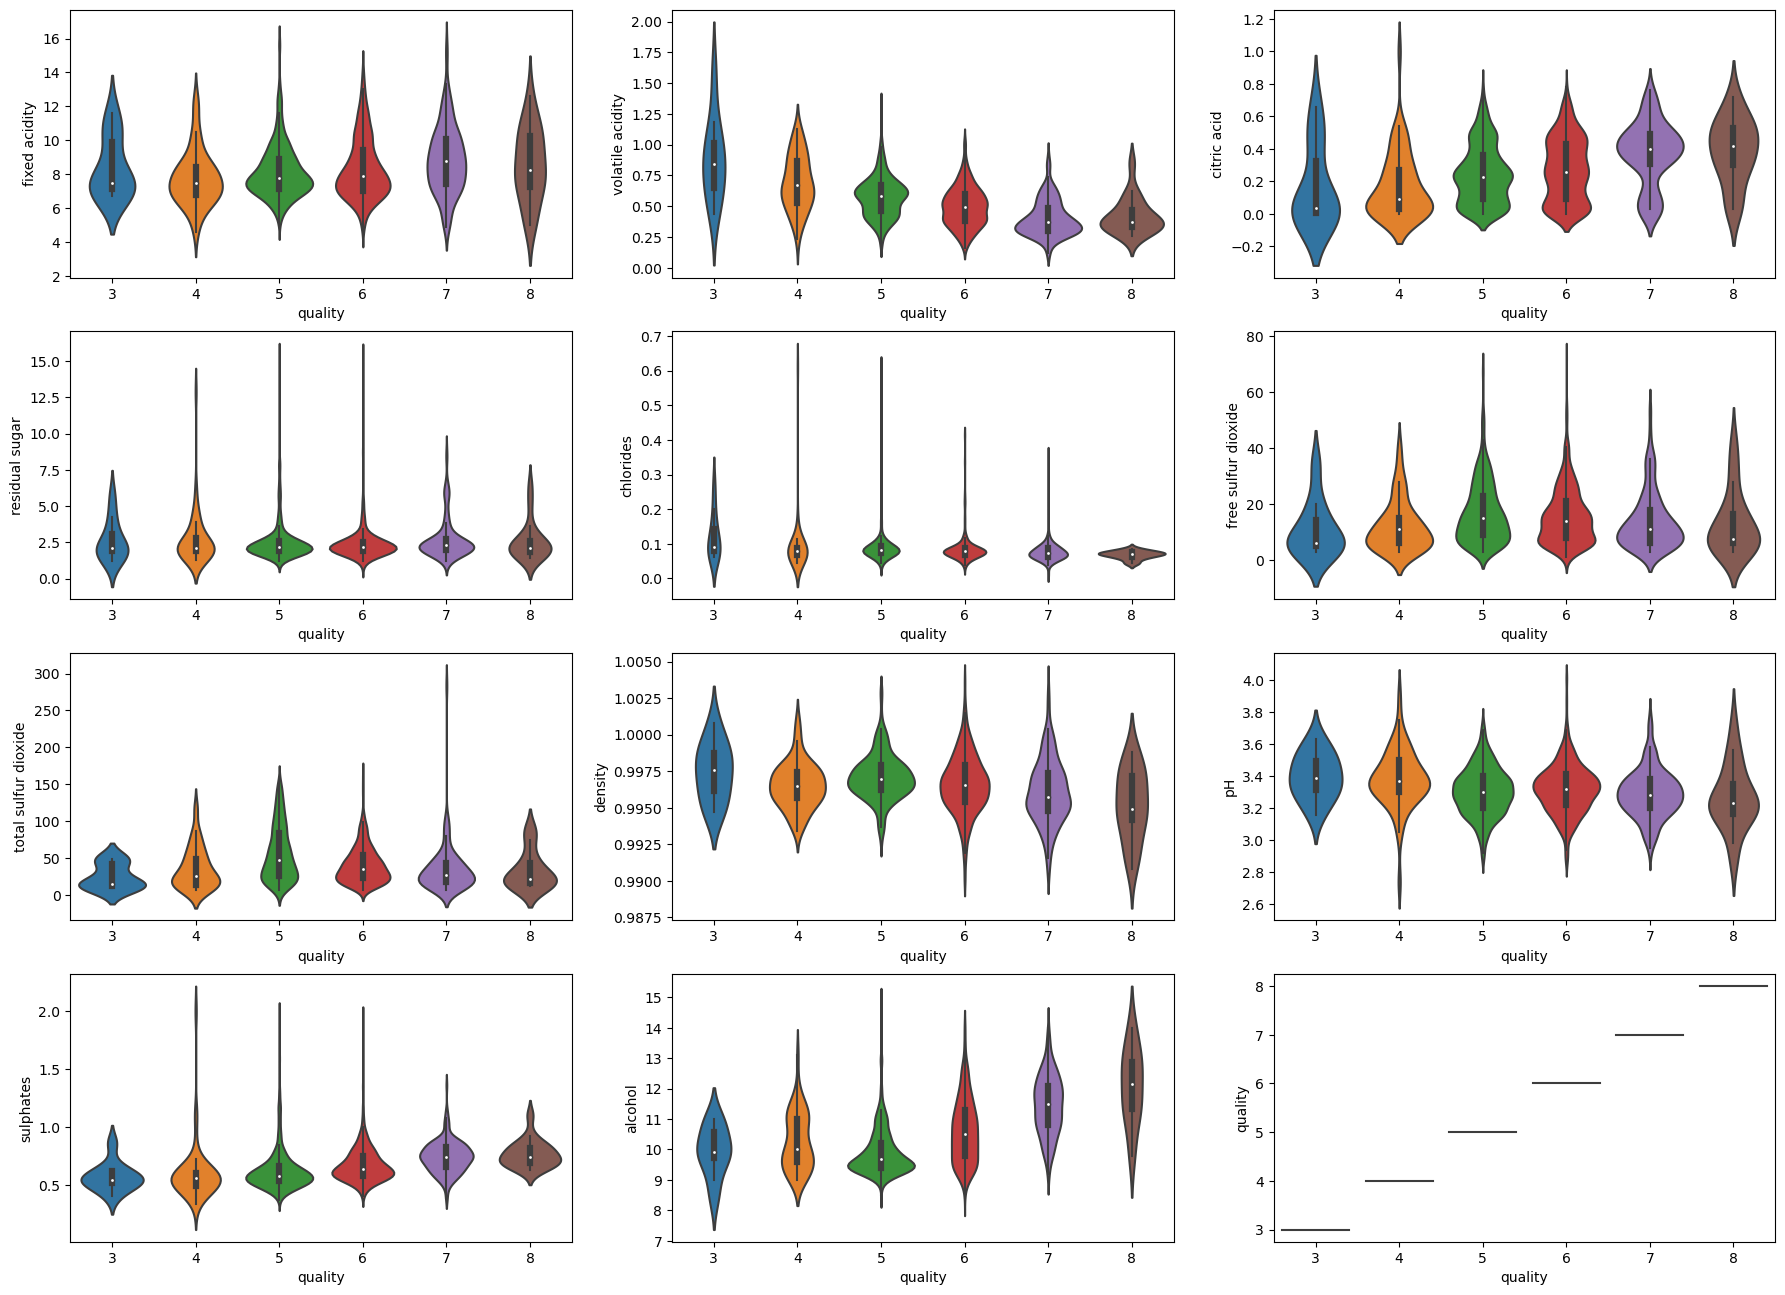

In [10]:
draw_multivarient_plot(dataset,4,3,"violin")

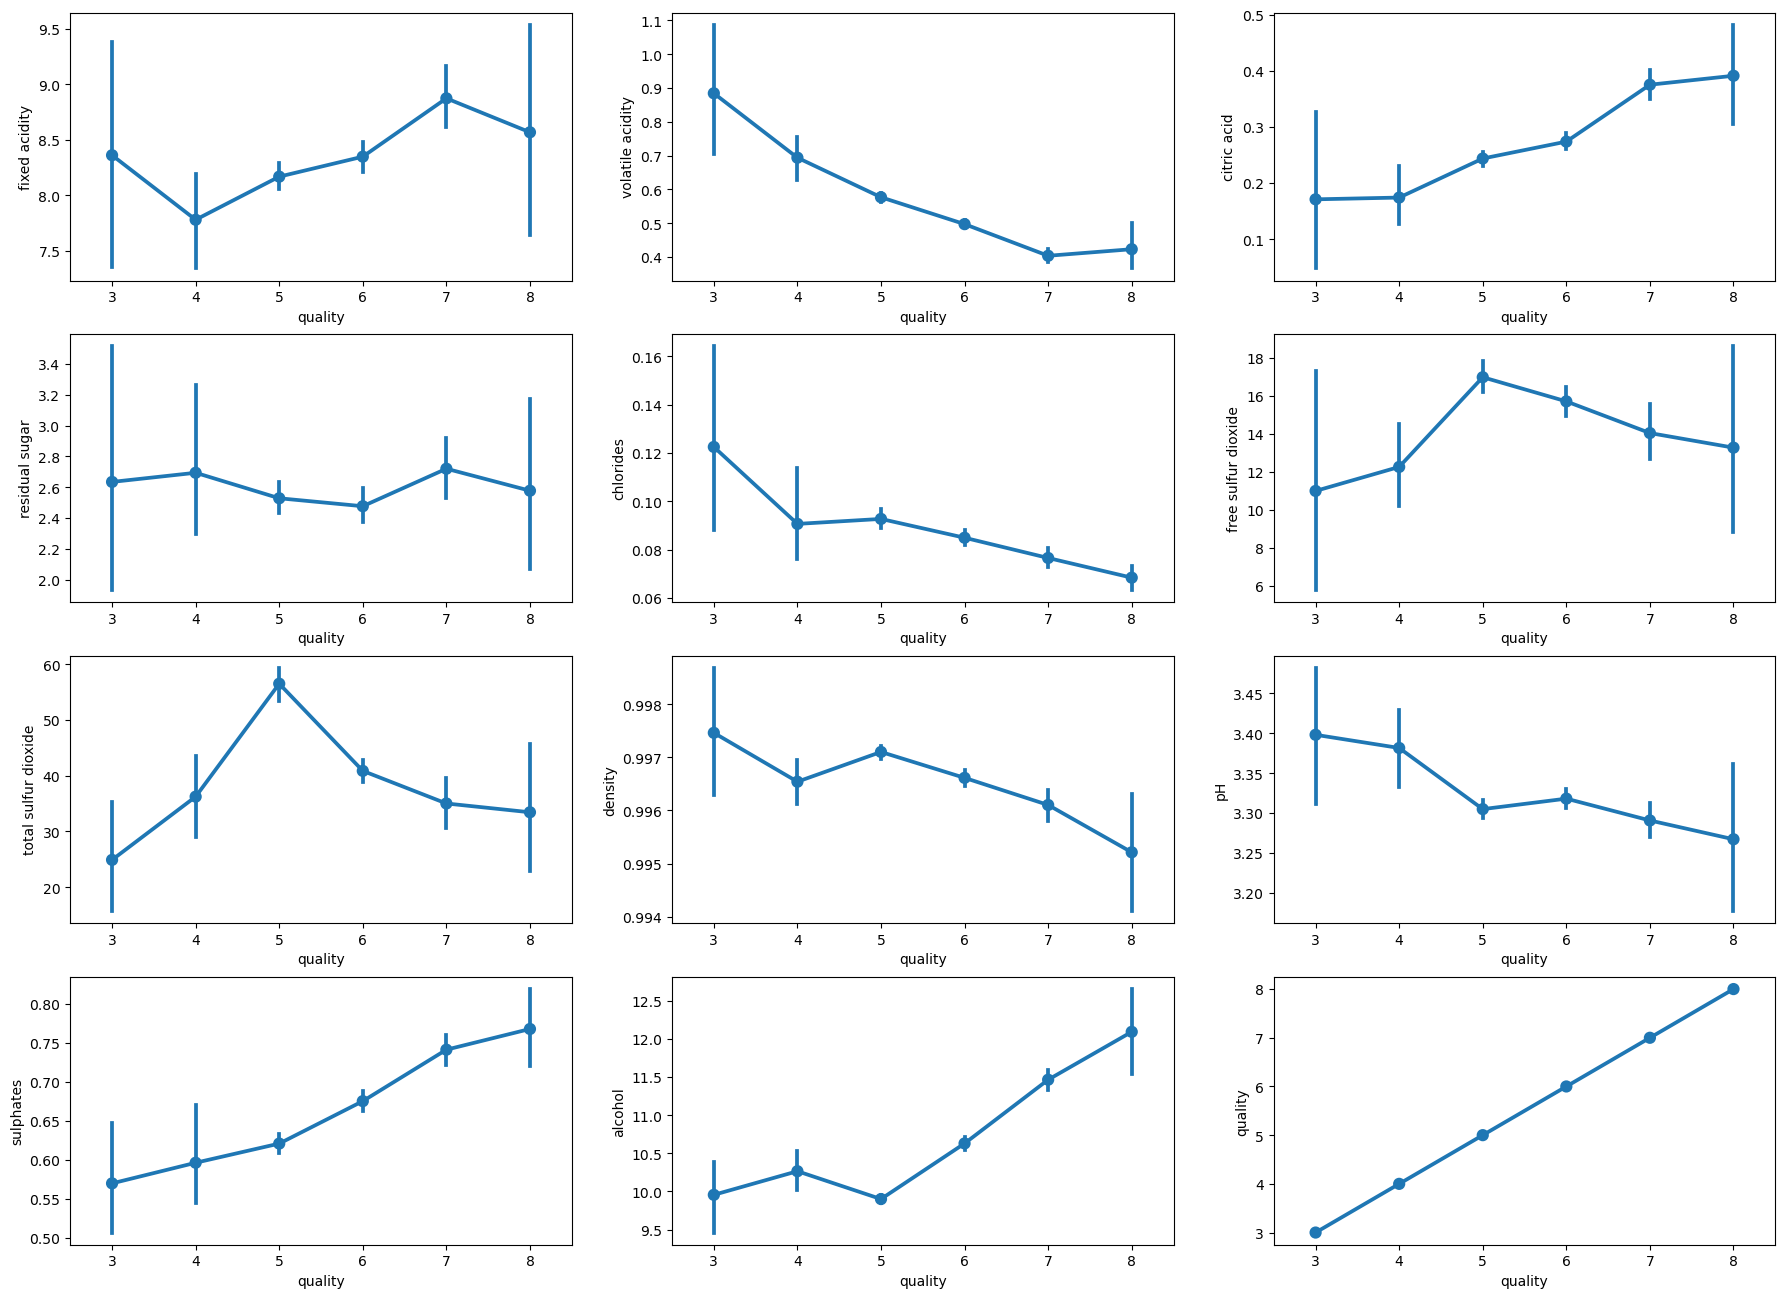

In [12]:
draw_multivarient_plot(dataset,4,3,"pointplot")

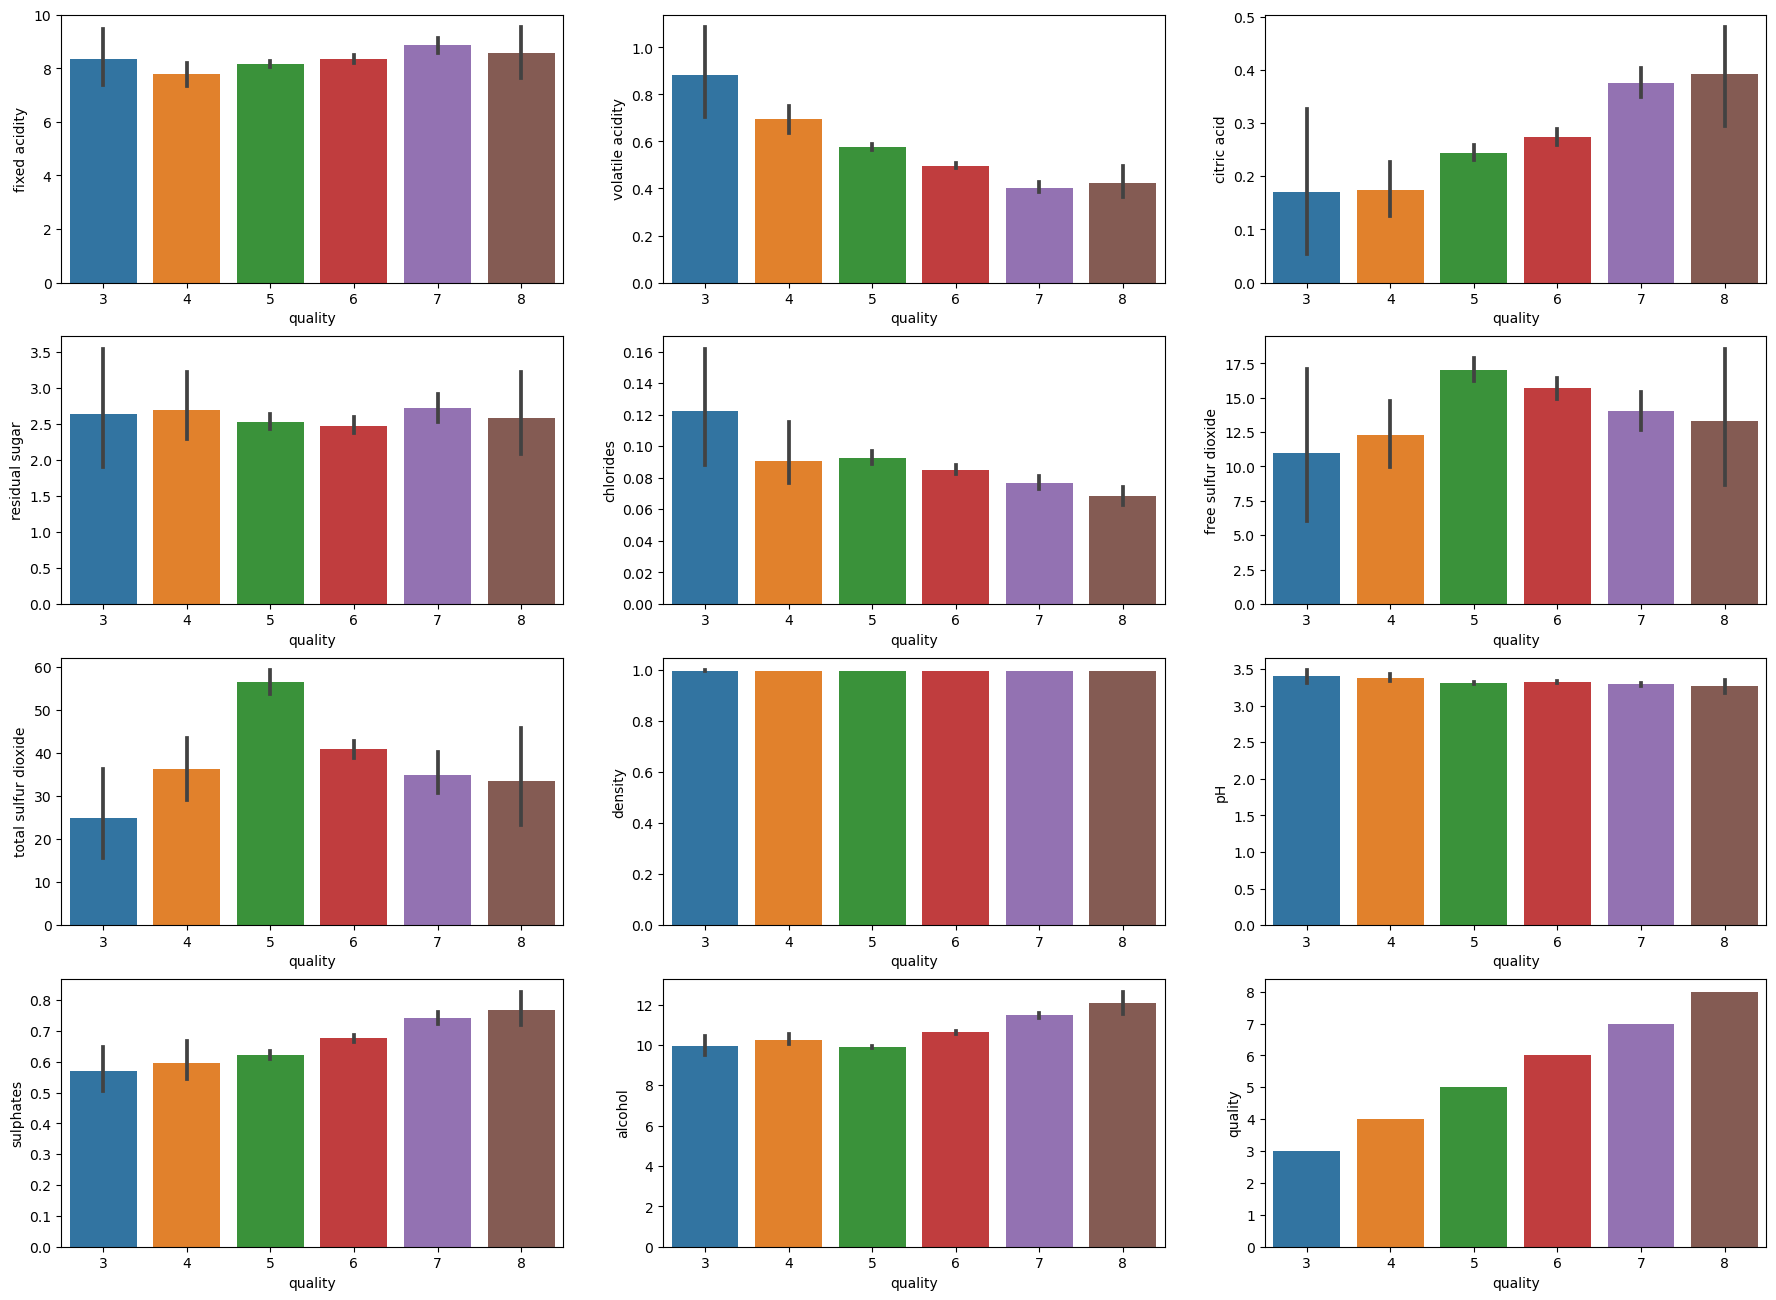

In [13]:
draw_multivarient_plot(dataset,4,3,"bar")

In [24]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))
         

In [25]:
dataset_temp=dataset.copy(deep=True)
X=dataset.drop('quality', axis=1)
y=dataset['quality']

X=StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)


cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.55
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.63
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58


In [26]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':100, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

In [27]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.6333333333333333
best params: {'C': 100, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.68      0.74      0.71       195
           6       0.59      0.70      0.64       200
           7       0.71      0.33      0.45        61
           8       0.00      0.00      0.00         6

    accuracy                           0.63       480
   macro avg       0.33      0.29      0.30       480
weighted avg       0.61      0.63      0.61       480



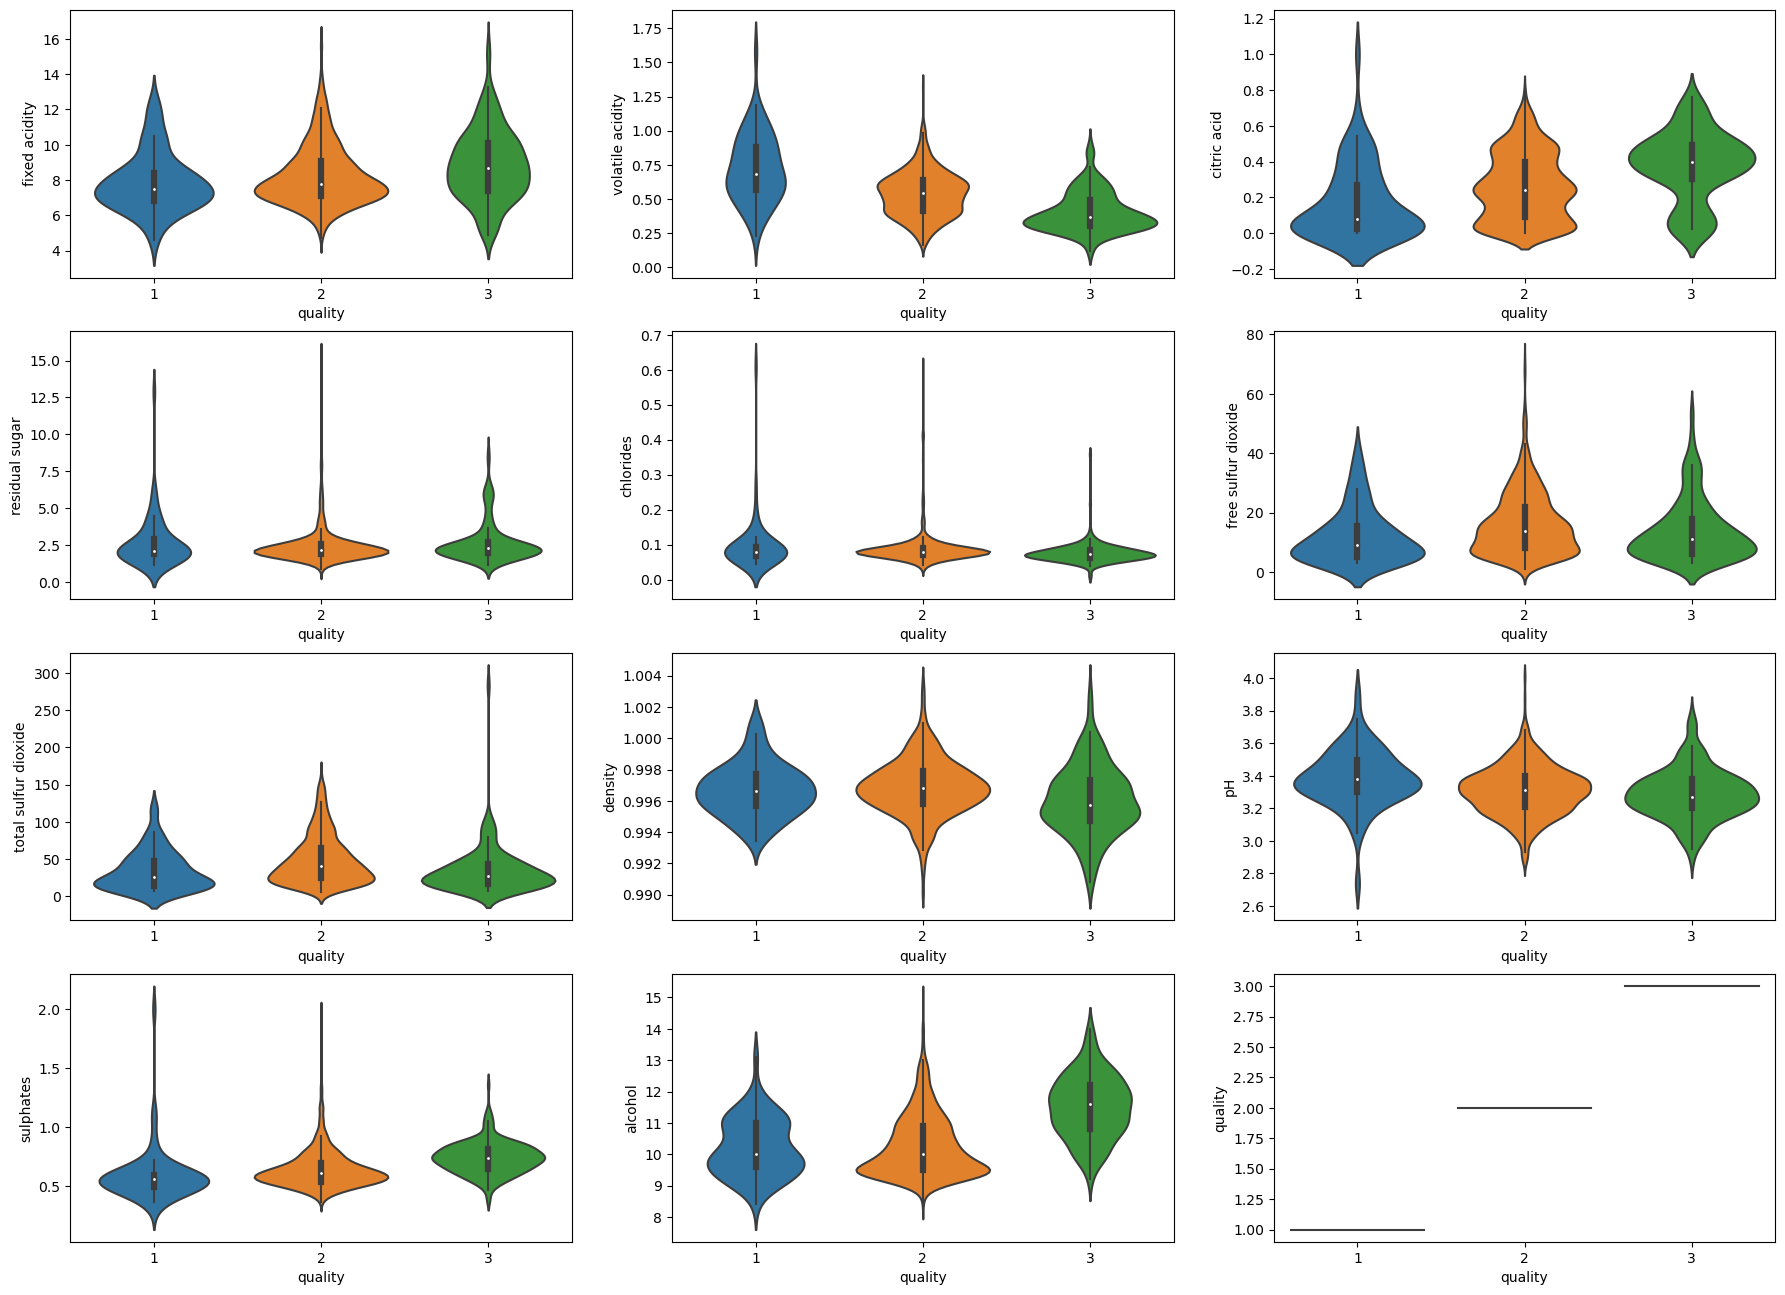

In [28]:
dataset_temp.loc[(dataset_temp['quality']==3),'quality']=1
dataset_temp.loc[(dataset_temp['quality']==4),'quality']=1

dataset_temp.loc[(dataset_temp['quality']==5),'quality']=2
dataset_temp.loc[(dataset_temp['quality']==6),'quality']=2

dataset_temp.loc[(dataset_temp['quality']==7),'quality']=3
dataset_temp.loc[(dataset_temp['quality']==8),'quality']=3

draw_multivarient_plot(dataset_temp,4,3,"violin")

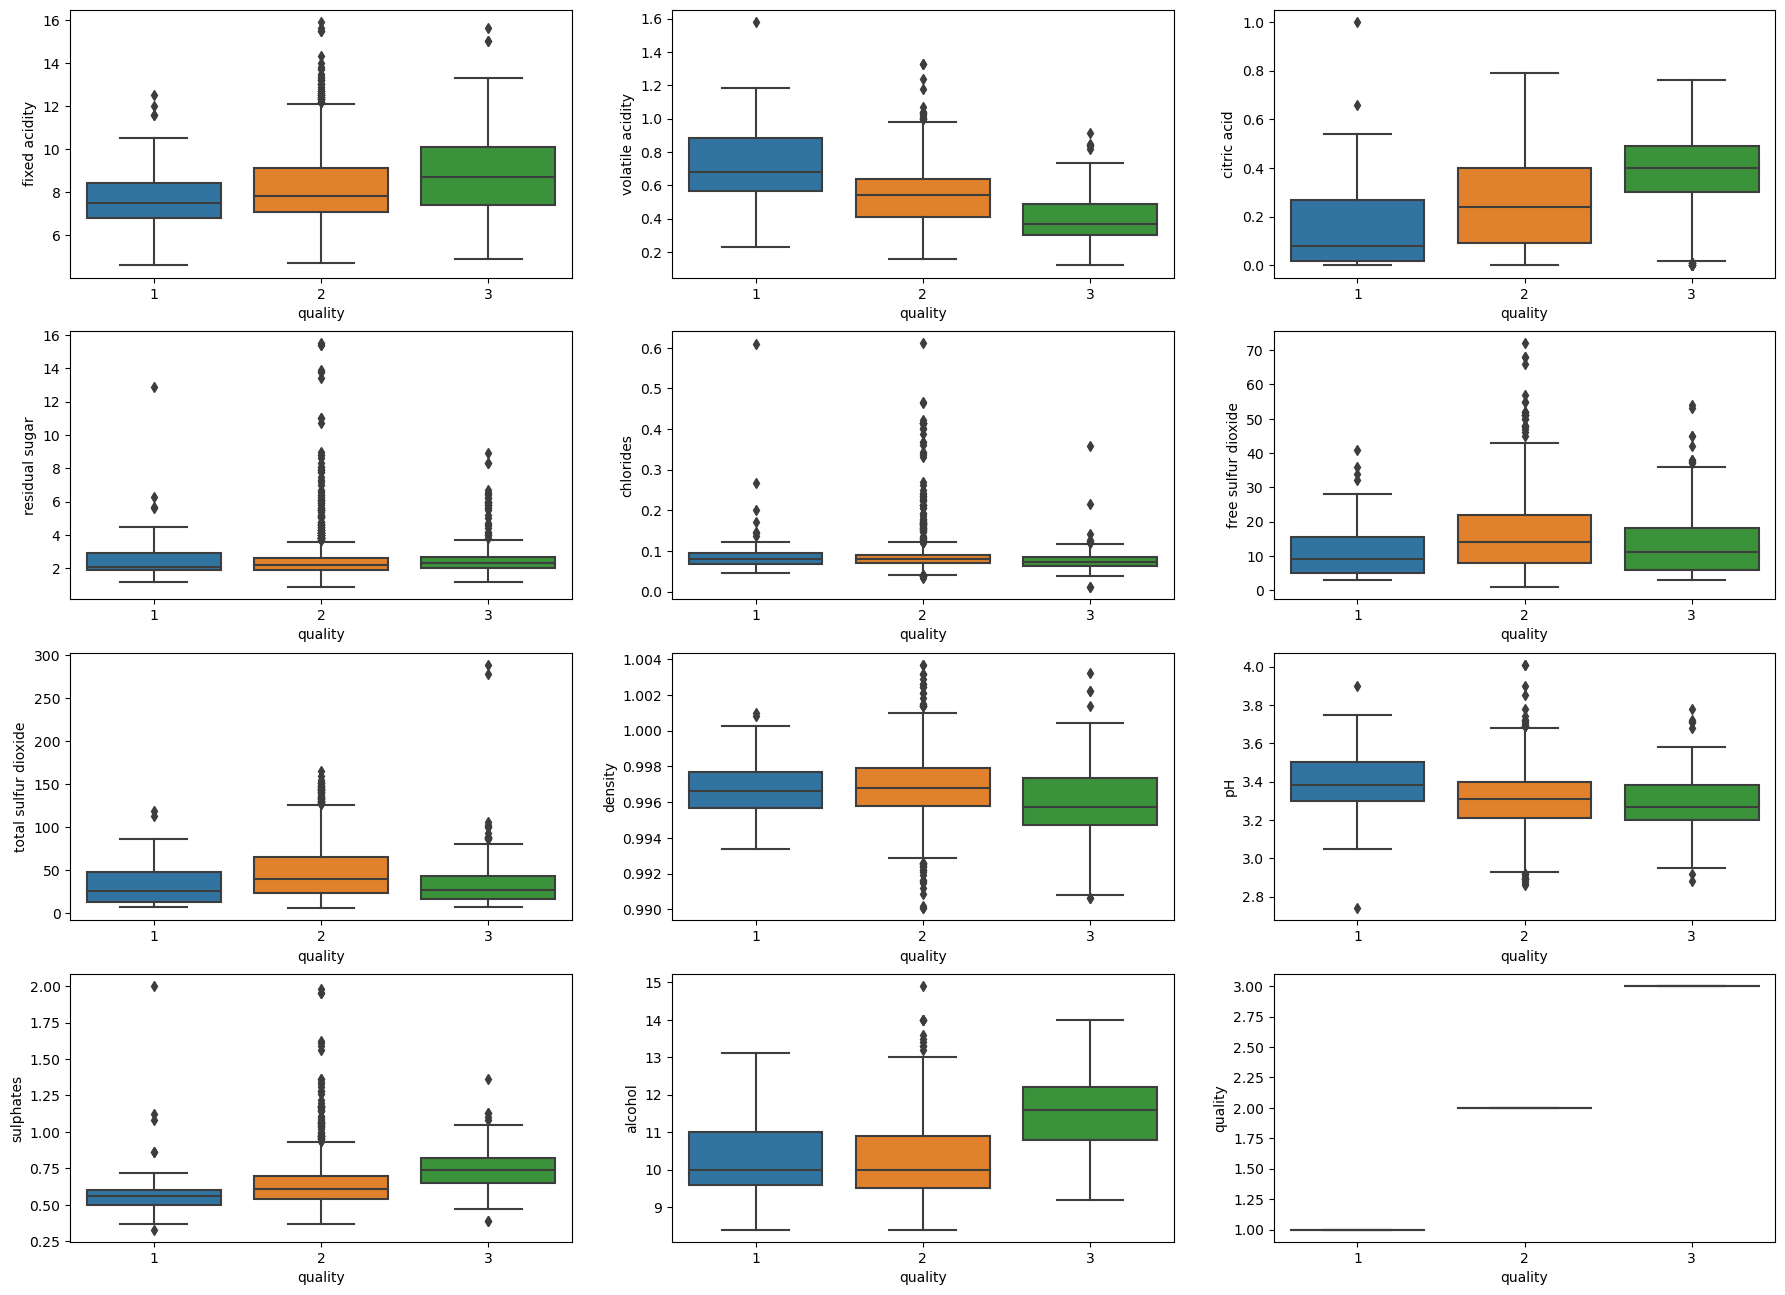

In [29]:
draw_multivarient_plot(dataset_temp,4,3,"box")

In [30]:
X_temp=dataset_temp.drop('quality', axis=1)
y_temp=dataset_temp['quality']
X=StandardScaler().fit_transform(X)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82


In [35]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)


best score: 0.85625
best params: {'C': 100, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           1       0.50      0.06      0.10        18
           2       0.85      0.99      0.92       395
           3       0.94      0.25      0.40        67

    accuracy                           0.86       480
   macro avg       0.77      0.43      0.47       480
weighted avg       0.85      0.86      0.82       480

